# Hotel Cancellation Machine Learning Modell

In [ ]:
#installieren der relevanten libraries
pip install -r requirements.txt

In [17]:
#importieren der relevanten libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

## 1. Load and inspect dataset

The Kaggle dataset on hotel reservations provides detailed information about bookings made by customers. It offers valuable insights for analyzing booking patterns, demand forecasting, and customer behavior in the hospitality industry. With a rich collection of data, it serves as a valuable resource for researchers and data scientists working on hotel management and related fields.

In [18]:
#laden des main dataframes und Darstellung der ersten 5 Zeilen
csv_url = "https://raw.githubusercontent.com/Flitschi7/stornierungsvorhersage-im-hotelgewerbe/main/hotel_reservations.csv"
main_df = pd.read_csv(csv_url)
main_df.head()


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [19]:
#Dataframe mit den Spaltennamen und den Datentypen der Spalten erstellen
main_df.describe(include='all')

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275,36275.000000,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275
unique,36275,NaN,NaN,NaN,NaN,4,NaN,7,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,2
top,INN00001,NaN,NaN,NaN,NaN,Meal Plan 1,NaN,Room_Type 1,NaN,NaN,NaN,NaN,Online,NaN,NaN,NaN,NaN,NaN,Not_Canceled
freq,1,NaN,NaN,NaN,NaN,27835,NaN,28130,NaN,NaN,NaN,NaN,23214,NaN,NaN,NaN,NaN,NaN,24390
mean,NaN,1.844962,0.105279,0.810724,2.204300,NaN,0.030986,NaN,85.232557,2017.820427,7.423653,15.596995,NaN,0.025637,0.023349,0.153411,103.423539,0.619655,NaN
std,NaN,0.518715,0.402648,0.870644,1.410905,NaN,0.173281,NaN,85.930817,0.383836,3.069894,8.740447,NaN,0.158053,0.368331,1.754171,35.089424,0.786236,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,2017.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,2.000000,0.000000,0.000000,1.000000,NaN,0.000000,NaN,17.000000,2018.000000,5.000000,8.000000,NaN,0.000000,0.000000,0.000000,80.300000,0.000000,NaN
50%,NaN,2.000000,0.000000,1.000000,2.000000,NaN,0.000000,NaN,57.000000,2018.000000,8.000000,16.000000,NaN,0.000000,0.000000,0.000000,99.450000,0.000000,NaN
75%,NaN,2.000000,0.000000,2.000000,3.000000,NaN,0.000000,NaN,126.000000,2018.000000,10.000000,23.000000,NaN,0.000000,0.000000,0.000000,120.000000,1.000000,NaN


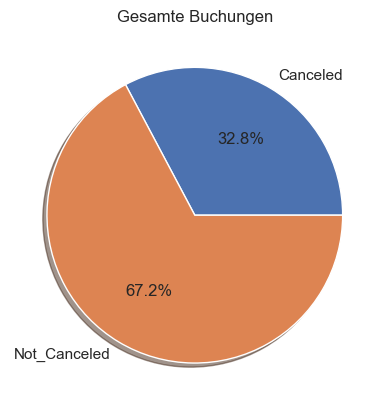

In [20]:
#überprüfen wie die Verteilung der stornierten Buchungen ist
booking_status_count = main_df.groupby('booking_status')['Booking_ID'].count().reset_index()
def func(pct):
  return "{:1.1f}%".format(pct)
plt.pie(booking_status_count.Booking_ID.values, labels=booking_status_count.booking_status.values, autopct=lambda pct: func(pct), shadow=True)
plt.title('Gesamte Buchungen')
plt.show()


# 2. Data cleaning

In [21]:
#Duplikate in den Daten finden
main_df[main_df.duplicated(keep=False)] 

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status


In [22]:
#Duplikate in den IDs finden
main_df['Booking_ID'][main_df['Booking_ID'].duplicated(keep=False)] 

Series([], Name: Booking_ID, dtype: object)

In [23]:
#Nullwerte in den Daten finden
main_df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

### Drop features

In [24]:
#ID Spalte löschen
main_df = main_df.drop(['Booking_ID'], axis = 1)


In [25]:
#arrival year month und date sind keine relevanten features
main_df = main_df.drop(['arrival_year','arrival_date'], axis = 1)
#arrival date kann noch als feature genutzt werden da eventuell saisonale Schwankungen auftreten

In [26]:
main_df.describe(include='all')

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,36275.000000,36275.000000,36275.000000,36275.000000,36275,36275.000000,36275,36275.000000,36275.000000,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275
unique,NaN,NaN,NaN,NaN,4,NaN,7,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,Meal Plan 1,NaN,Room_Type 1,NaN,NaN,Online,NaN,NaN,NaN,NaN,NaN,Not_Canceled
freq,NaN,NaN,NaN,NaN,27835,NaN,28130,NaN,NaN,23214,NaN,NaN,NaN,NaN,NaN,24390
mean,1.844962,0.105279,0.810724,2.204300,NaN,0.030986,NaN,85.232557,7.423653,NaN,0.025637,0.023349,0.153411,103.423539,0.619655,NaN
std,0.518715,0.402648,0.870644,1.410905,NaN,0.173281,NaN,85.930817,3.069894,NaN,0.158053,0.368331,1.754171,35.089424,0.786236,NaN
min,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2.000000,0.000000,0.000000,1.000000,NaN,0.000000,NaN,17.000000,5.000000,NaN,0.000000,0.000000,0.000000,80.300000,0.000000,NaN
50%,2.000000,0.000000,1.000000,2.000000,NaN,0.000000,NaN,57.000000,8.000000,NaN,0.000000,0.000000,0.000000,99.450000,0.000000,NaN
75%,2.000000,0.000000,2.000000,3.000000,NaN,0.000000,NaN,126.000000,10.000000,NaN,0.000000,0.000000,0.000000,120.000000,1.000000,NaN


In [27]:
#ändern des Datentyps der Spalte booking_status
main_df['booking_status'] = main_df['booking_status'].map({'Canceled': 0, 'Not_Canceled': 1})


In [28]:
main_df.describe(include='all')

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,36275.000000,36275.000000,36275.000000,36275.000000,36275,36275.000000,36275,36275.000000,36275.000000,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
unique,NaN,NaN,NaN,NaN,4,NaN,7,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,Meal Plan 1,NaN,Room_Type 1,NaN,NaN,Online,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,27835,NaN,28130,NaN,NaN,23214,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.844962,0.105279,0.810724,2.204300,NaN,0.030986,NaN,85.232557,7.423653,NaN,0.025637,0.023349,0.153411,103.423539,0.619655,0.672364
std,0.518715,0.402648,0.870644,1.410905,NaN,0.173281,NaN,85.930817,3.069894,NaN,0.158053,0.368331,1.754171,35.089424,0.786236,0.469358
min,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,NaN,0.000000,NaN,17.000000,5.000000,NaN,0.000000,0.000000,0.000000,80.300000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,NaN,0.000000,NaN,57.000000,8.000000,NaN,0.000000,0.000000,0.000000,99.450000,0.000000,1.000000
75%,2.000000,0.000000,2.000000,3.000000,NaN,0.000000,NaN,126.000000,10.000000,NaN,0.000000,0.000000,0.000000,120.000000,1.000000,1.000000


In [29]:
clean_df =main_df.copy()

# 3. Data Understanding

## 3.1 checking numeric Data

In [30]:
numeric_features = clean_df.select_dtypes(include=[np.number])
numeric_features.dtypes


no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
required_car_parking_space                int64
lead_time                                 int64
arrival_month                             int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                            int64
dtype: object

re_quired_car_parking_space und repeated_guest sind kategoriale daten, da es nur ja oder nein gibt.

### 3.1.1 Vizualisation of the data

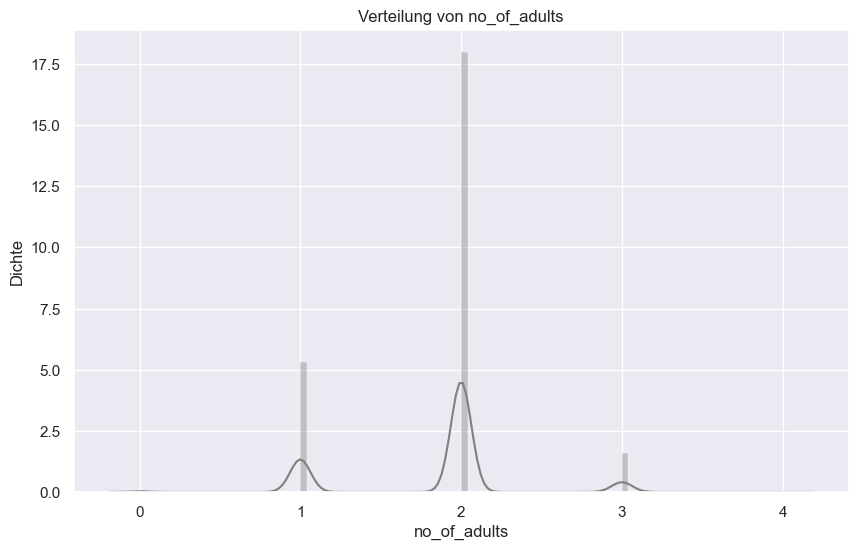

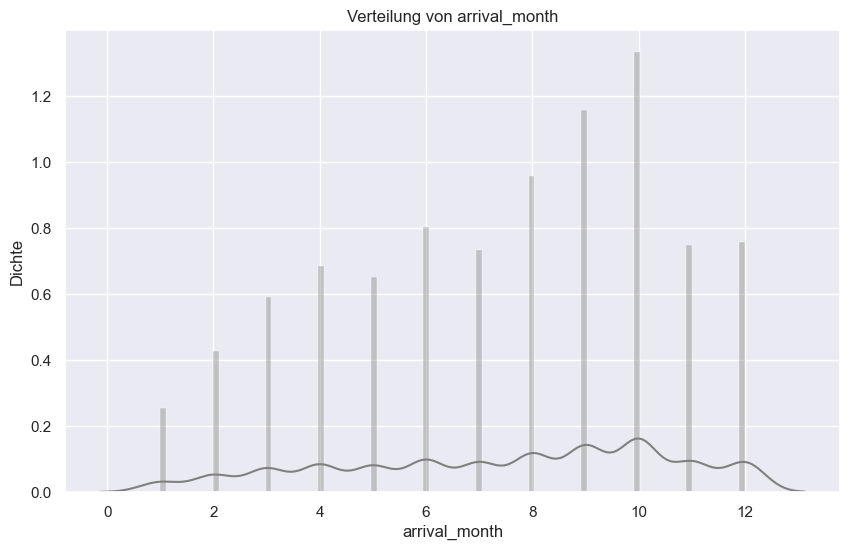

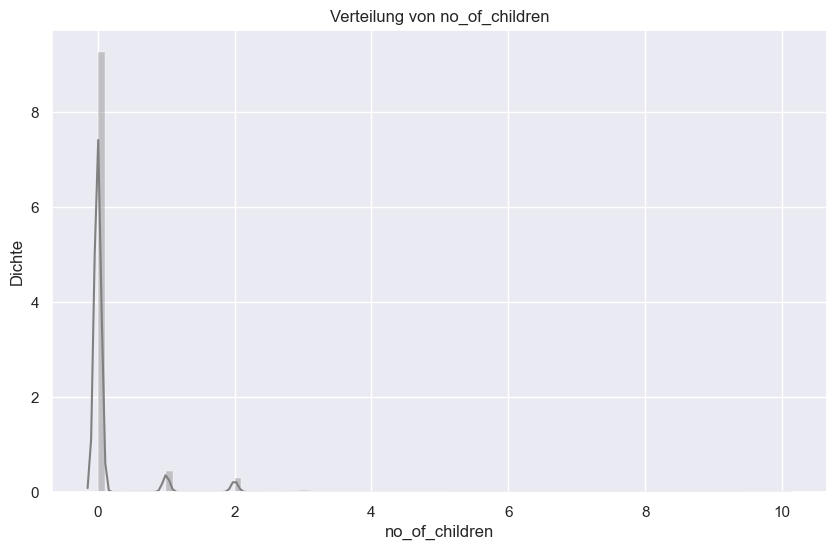

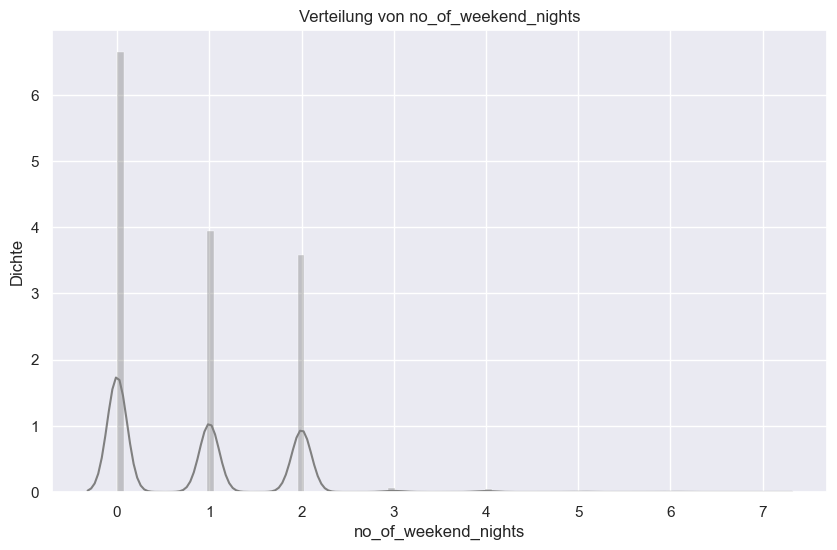

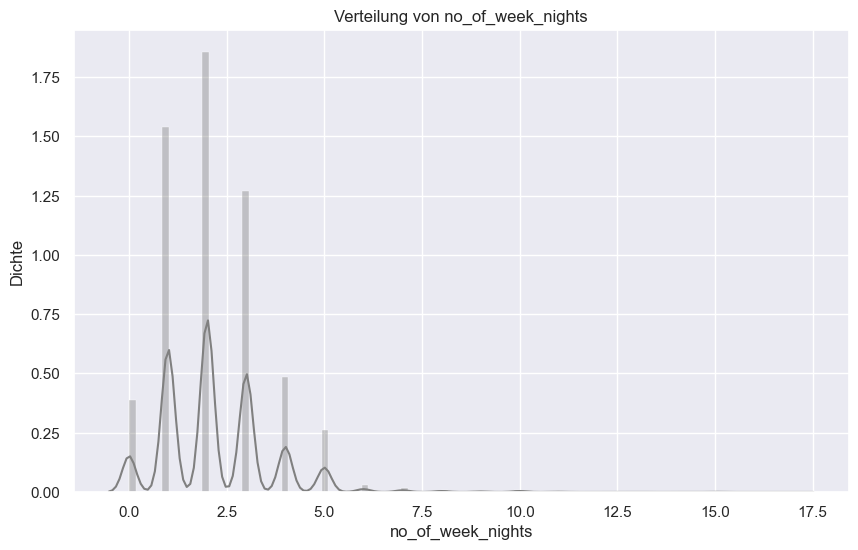

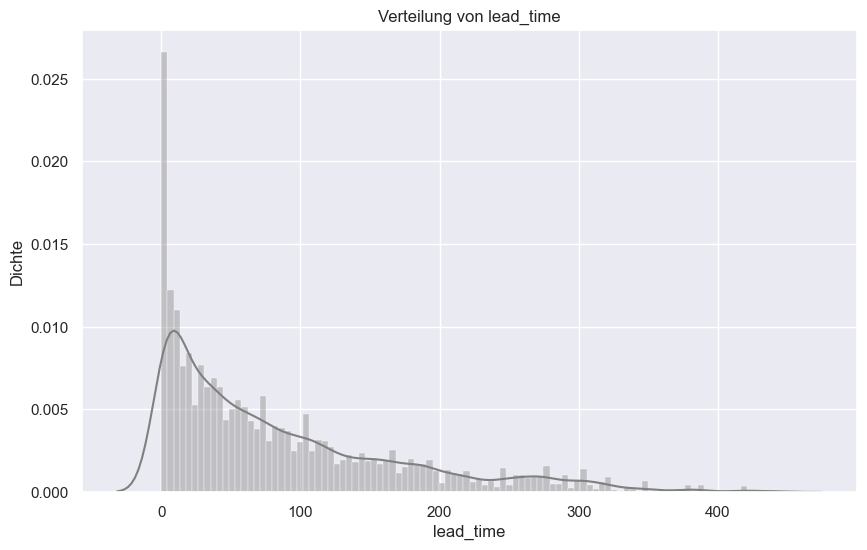

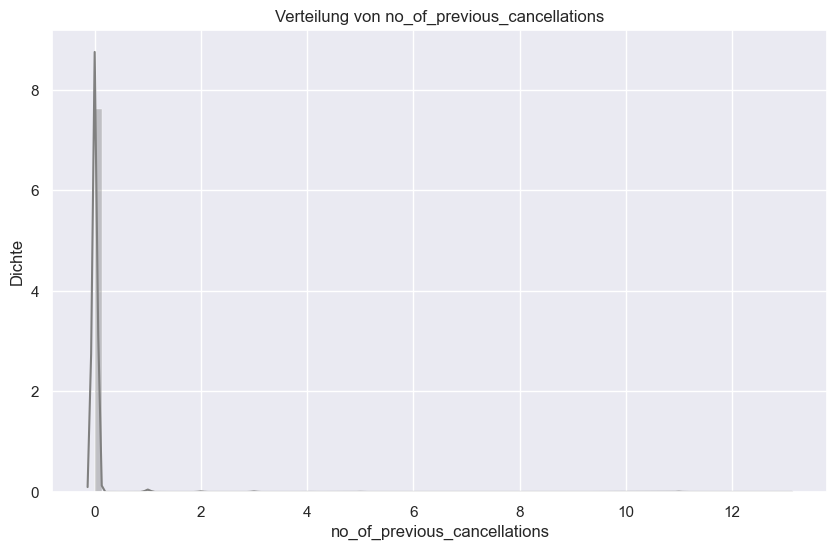

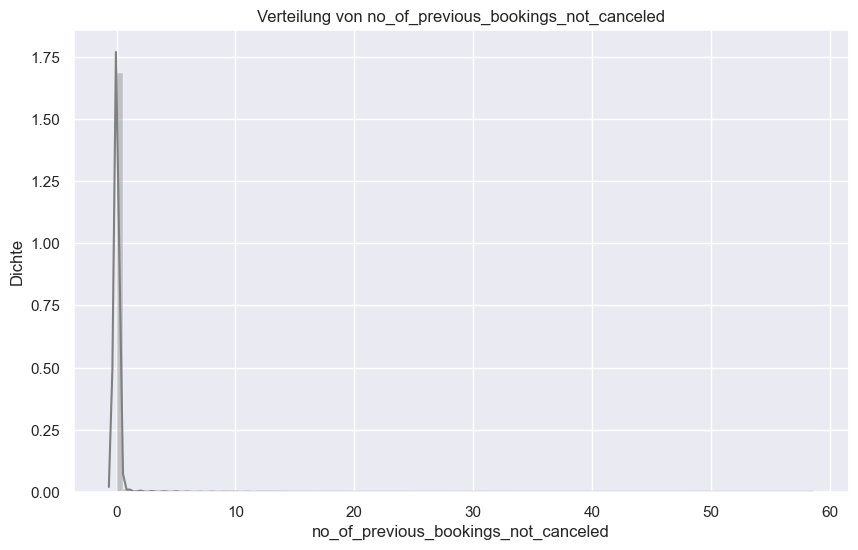

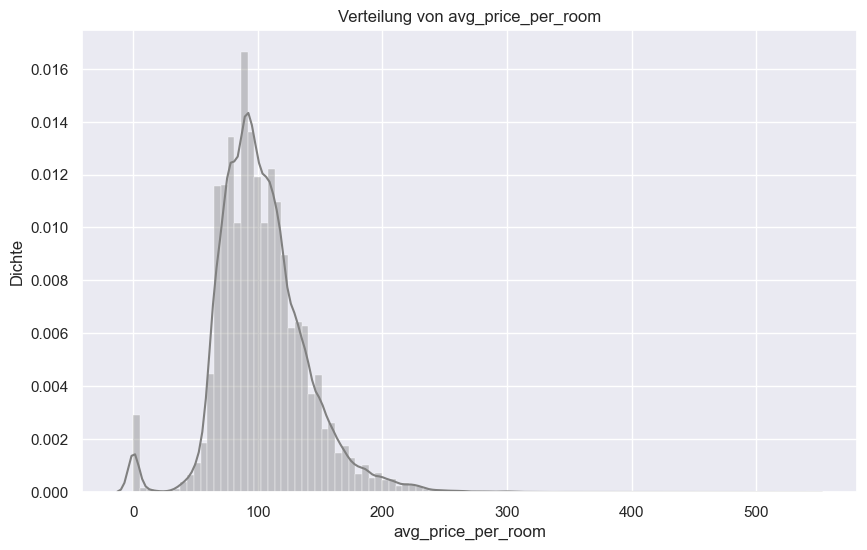

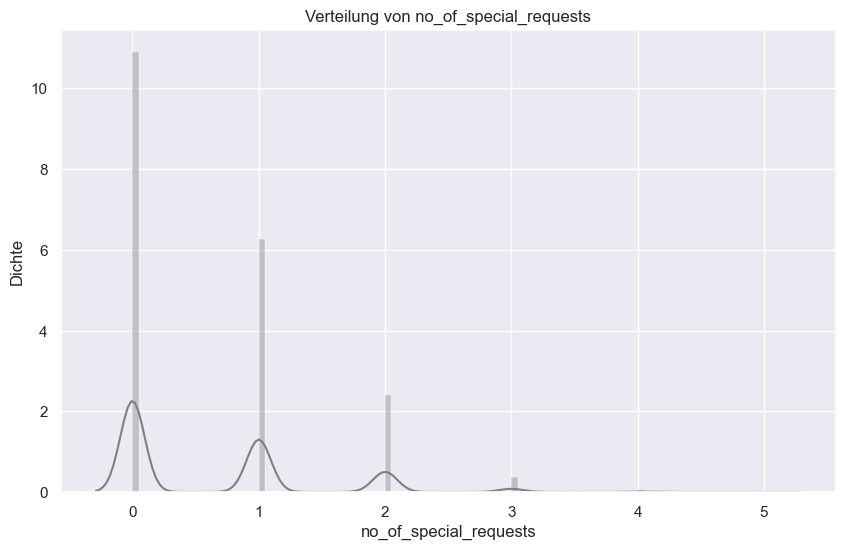

In [31]:
features = ['no_of_adults', 'arrival_month', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled','avg_price_per_room','no_of_special_requests']

for feature in features:
    plt.figure(figsize=(10, 6))
    sns.histplot(numeric_features[feature], kde=True, stat='density', kde_kws=dict(cut=3), bins=100, color='gray', alpha=0.4, linewidth=0.25)
    plt.title(f'Verteilung von {feature}')
    plt.xlabel(feature)
    plt.ylabel('Dichte')
    plt.show()

In [32]:
for feature in features:
    distribution = numeric_features[feature].value_counts().reset_index()
    distribution.columns = [feature, 'frequency']
    distribution = distribution.sort_values(feature)
    
    print(f"Verteilung von '{feature}':")
    print(distribution)
    print()

Verteilung von 'no_of_adults':
   no_of_adults  frequency
3             0        139
1             1       7695
0             2      26108
2             3       2317
4             4         16

Verteilung von 'arrival_month':
    arrival_month  frequency
11              1       1014
10              2       1704
9               3       2358
7               4       2736
8               5       2598
3               6       3203
6               7       2920
2               8       3813
1               9       4611
0              10       5317
5              11       2980
4              12       3021

Verteilung von 'no_of_children':
   no_of_children  frequency
0               0      33577
1               1       1618
2               2       1058
3               3         19
4               9          2
5              10          1

Verteilung von 'no_of_weekend_nights':
   no_of_weekend_nights  frequency
0                     0      16872
1                     1       9995
2              

## 3.1.2 Interpretation of the data
#### Verteilung von 'no_of_adults':

Die Mehrheit der Buchungen hat 2 Erwachsene.
Es gibt jedoch auch einige Buchungen mit 1, 3 und 4 Erwachsenen.
Es gibt 139 Buchungen, bei denen keine Erwachsenen angegeben sind, was möglicherweise auf Fehler oder ungewöhnliche Situationen hinweist.

#### Verteilung von arrival_month

Die Mehrheit der Besuche erfolgt im Oktober, das lässt eventuell darauf schließen dass hier eine Saisonalität vorliegt

#### Verteilung von 'no_of_children':

Die Mehrheit der Buchungen hat keine Kinder.
Es gibt jedoch auch Buchungen mit 1, 2, 3, 4, 5 und sogar 10 Kindern.
Ein Problem könnte sein, dass es einige Buchungen gibt, die eine ungewöhnlich hohe Anzahl von Kindern angeben, wie z.B. 9 oder 10 Kinder. Dies könnte auf Fehler oder falsche Angaben hinweisen.

#### Verteilung von 'no_of_weekend_nights':

Die Mehrheit der Buchungen hat entweder keine Wochenendnächte oder 1 oder 2 Wochenendnächte.
Es gibt einige Buchungen mit 3, 4, 5, 6 und sogar 7 Wochenendnächten.

#### Verteilung von 'no_of_week_nights':

Die Mehrheit der Buchungen hat entweder 1 oder 2 Wochennächte.
Es gibt jedoch auch Buchungen mit bis zu 17 Wochennächten.


#### Verteilung von 'lead_time':

Die Verteilung der Vorlaufzeit (Zeit zwischen Buchung und Ankunft) ist ziemlich breit gestreut.
Es gibt Buchungen mit sehr kurzer Vorlaufzeit (0 bis 5 Tage) sowie Buchungen mit sehr langer Vorlaufzeit (mehrere Monate).
Hier ist der skew nach rechts sehr hoch


#### Verteilung von 'no_of_previous_cancellations':

Die Mehrheit der Buchungen hatte keine vorherigen Stornierungen.
Es gibt jedoch auch Buchungen mit 1, 2, 3, 4, 5 und sogar mehreren vorherigen Stornierungen.

#### Verteilung von 'avg_price_per_room':

Die Mehrheit der Buchungen ist um 100 verteilt.
Hier können wir eine Normalverteilung beobachten.
Zudem gibt es Buchungen für den Preis 0, das kann bedeuten, dass falsche Daten vorhanden sind oder per Aktionscode oder Gutschein gebucht wurden.

#### Verteilung von 'no_of_special_requests':

Ab einer Anzahl von 2 speziellen Anforderungen gibt es keine Stornierungen


## 3.1.3 Visualisation of feature to Target Variable

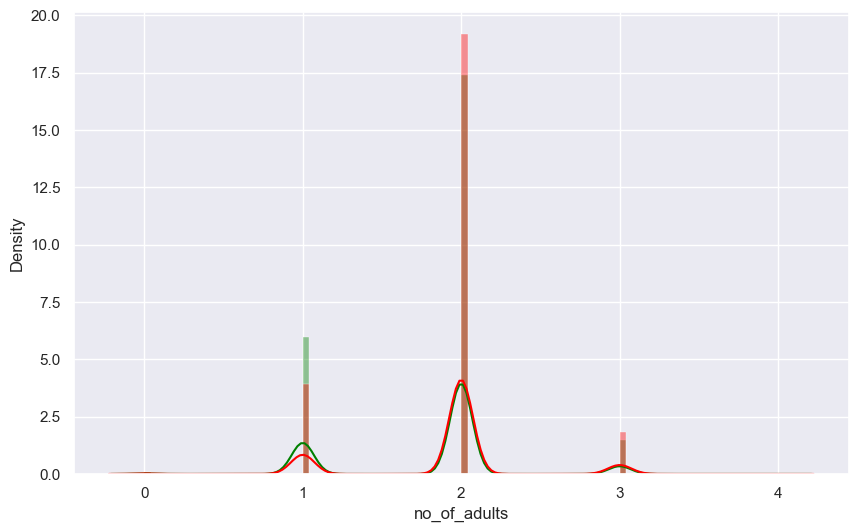

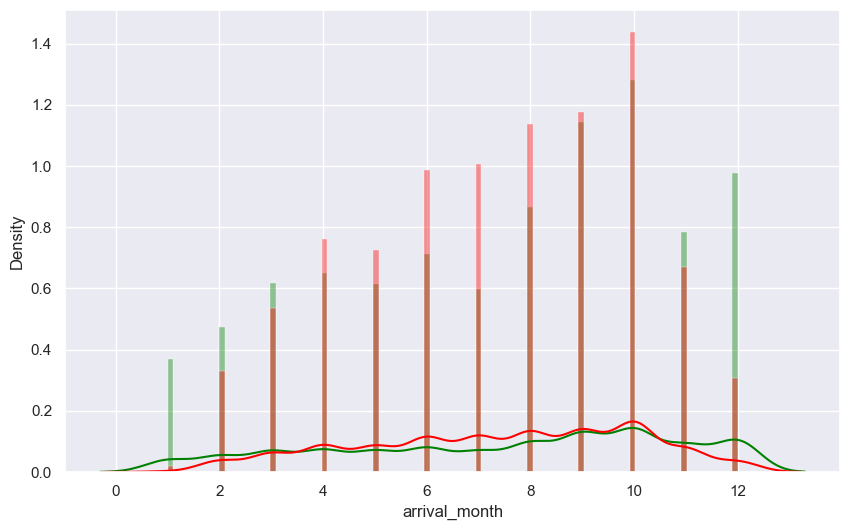

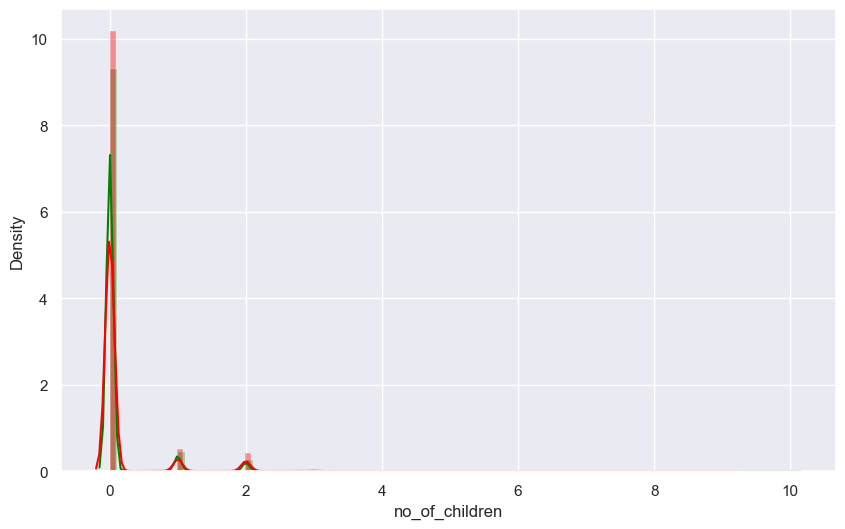

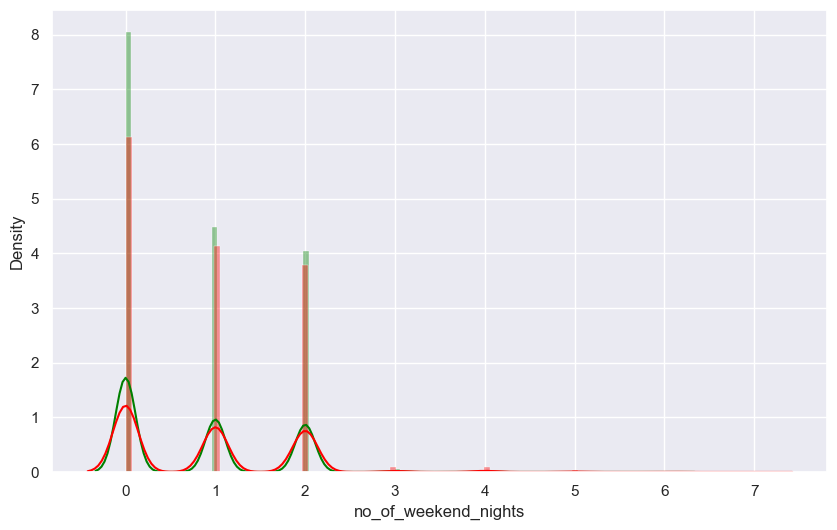

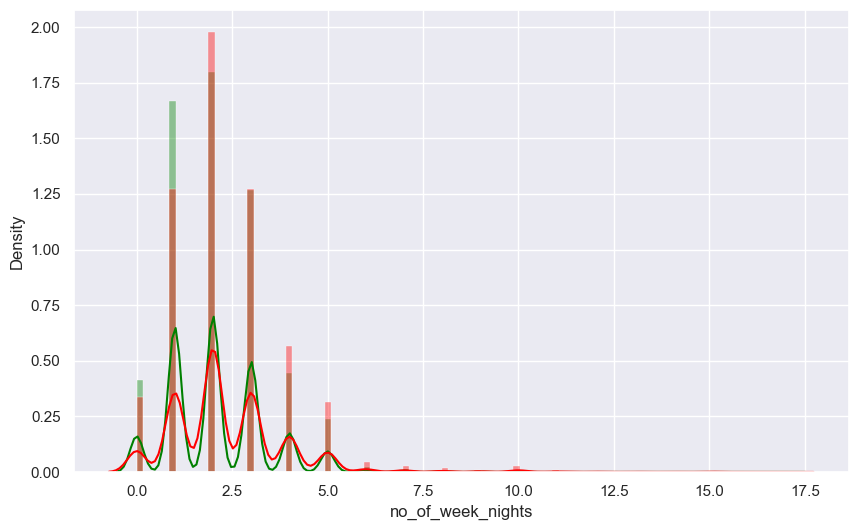

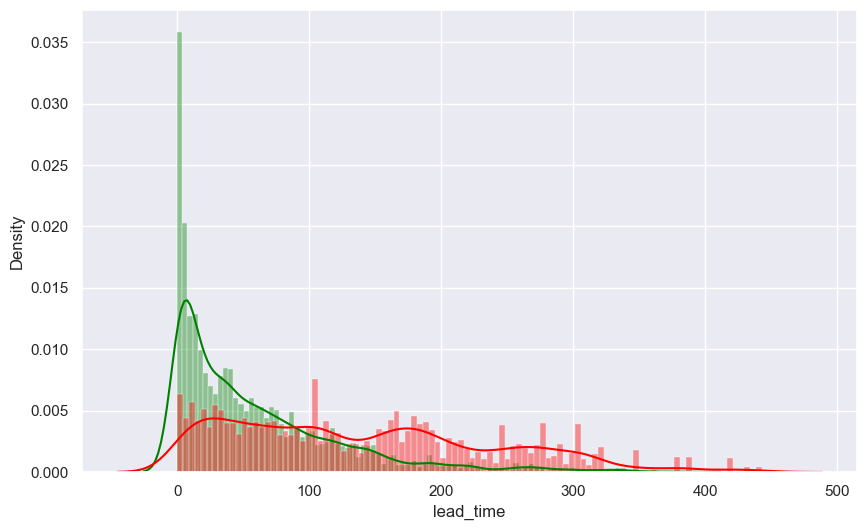

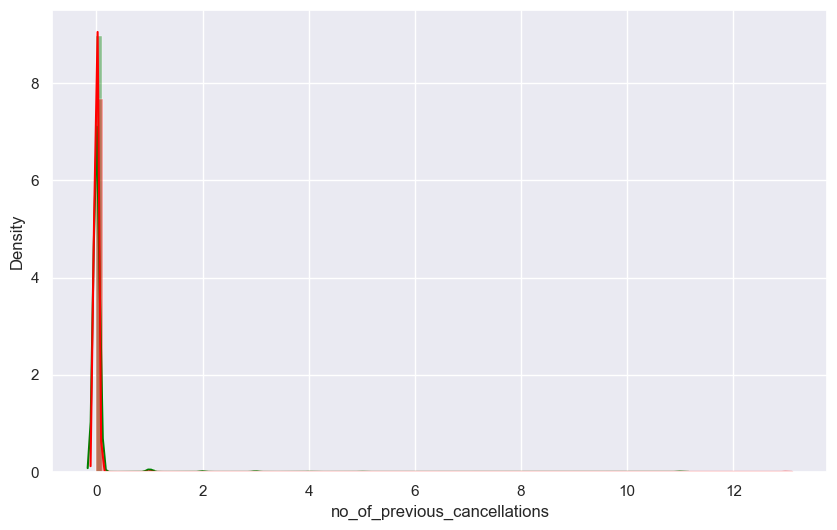

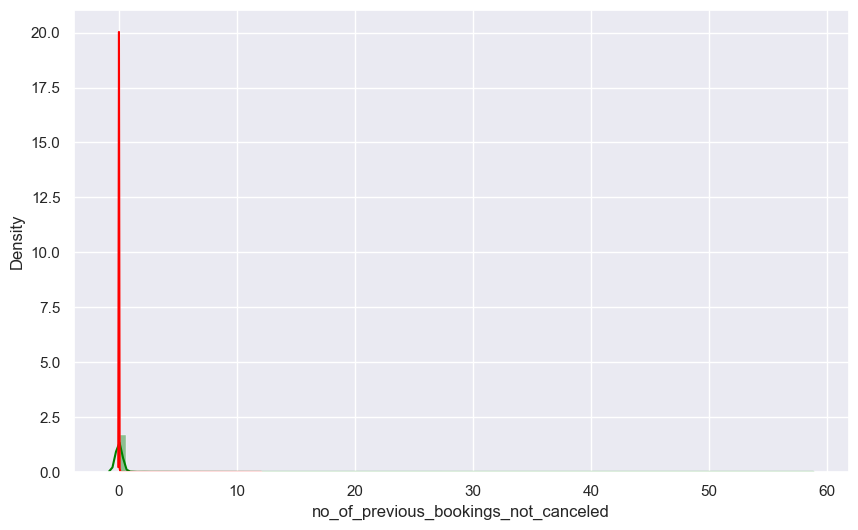

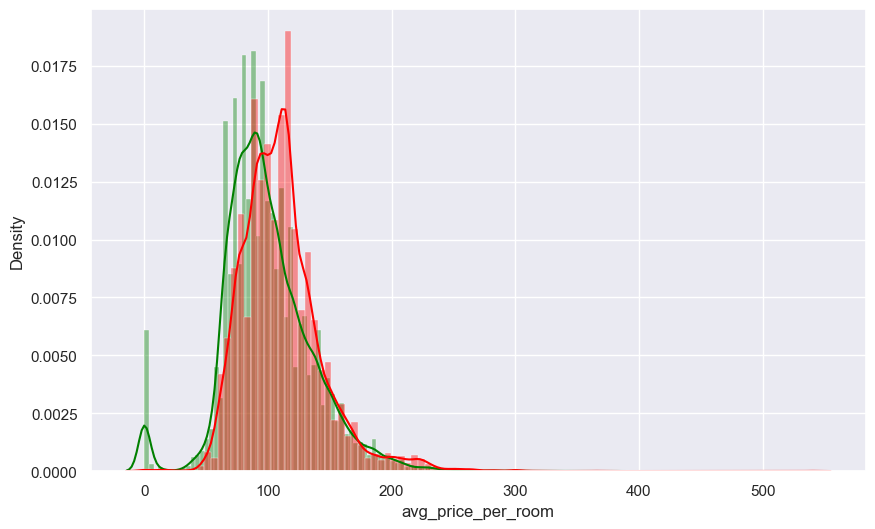

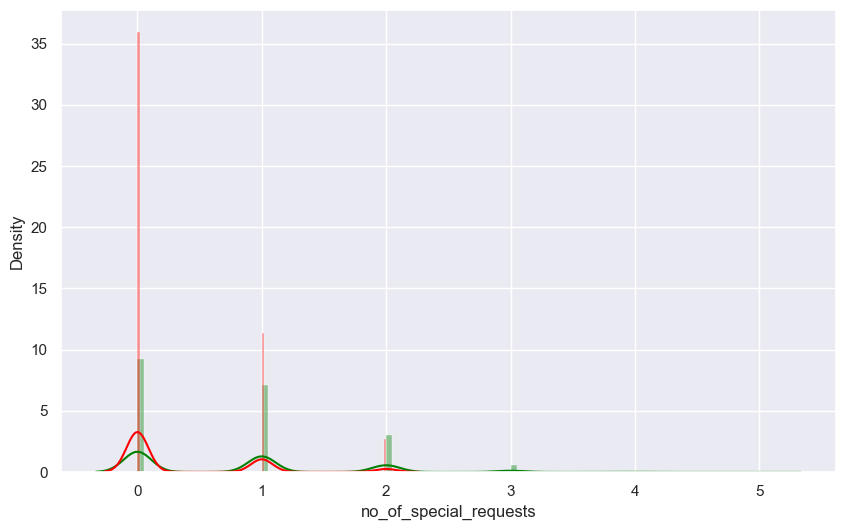

In [33]:
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.histplot(numeric_features[clean_df.booking_status == 1][feature],
                 bins=100,
                 color='green',
                 label='not canceled',
                 kde=True,
                 stat='density',
                 kde_kws=dict(cut=3),
                 alpha=0.4,
                 linewidth=0.25)
    sns.histplot(numeric_features[clean_df.booking_status == 0][feature],
                 bins=100,
                 color='red',
                 label='canceled',
                 kde=True,
                 stat='density',
                 kde_kws=dict(cut=3),
                 alpha=0.4,
                 linewidth=0.25)


## 3.1.4 Interpretation of the features to target variable

- Vorlaufzeit (lead time): Je länger die Vorlaufzeit, desto wahrscheinlicher ist die Stornierung der Buchung.
- Durchschnittspreis pro Zimmer (avg_price_per_room): Es gibt eine leichte Tendenz, dass höher preisige Zimmer storniert werden
- Es ist zu erkennen dass Buchungen welche in der Winter Urlaubssaison stattfinden tendenziell seltener storniert werden

Diese Fakten basieren auf den beobachteten Daten und zeigen Zusammenhänge zwischen den Merkmalen und dem Buchungsstatus auf.

## 3.1.5 Correlation Matrix

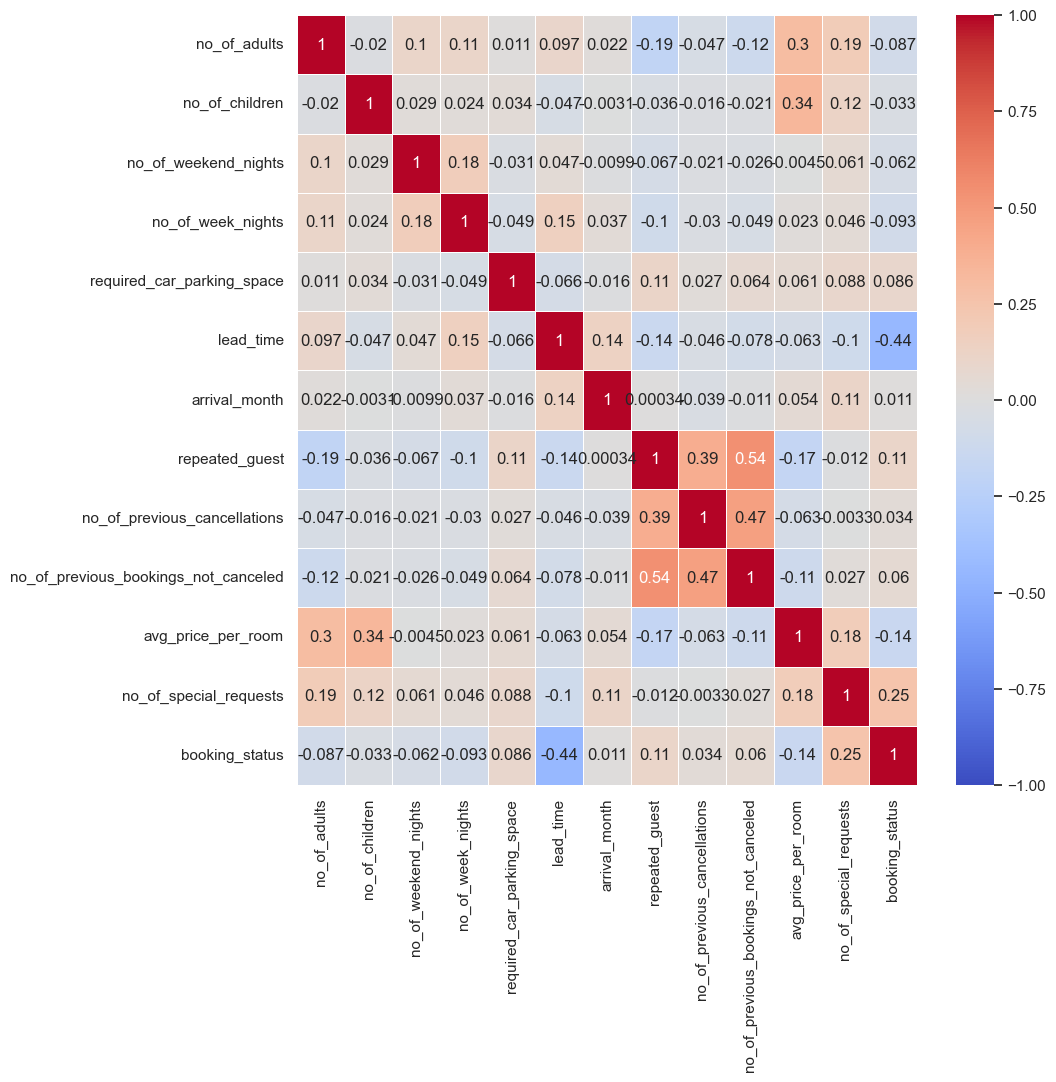

In [34]:
corr = numeric_features.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.show()

Es liegt nur eine negative Korrelation zu der lead_time vor
Die Nummer der speziellen Anforderungen hat eine leichte Korrelation zum booking status

## 3.2 Checking categorial Data

In [ ]:
meal_plan_comparison = pd.crosstab(clean_df['type_of_meal_plan'], clean_df['booking_status'])
plt.figure(figsize=(10, 6))
meal_plan_comparison.plot.bar(rot=0)
plt.xlabel('type_of_meal_plan')
plt.ylabel('Anzahl')
plt.legend(['Booking Status = canceled', 'Booking Status = not canceled'])
plt.title('Type_of_meal_plan pro booking_status')
plt.show()

Die Stornierungen sind bei Meal Plan 2 deutlich höher als sonst

In [ ]:
meal_plan_comparison = pd.crosstab(clean_df['room_type_reserved'], clean_df['booking_status'])
plt.figure(figsize=(10, 6))
meal_plan_comparison.plot.bar(rot=0)
plt.xlabel('room_type_reserved')
plt.ylabel('Anzahl')
plt.legend(['Booking Status = canceled', 'Booking Status = not canceled'])
plt.title('room_type_reserved pro booking_status')
plt.xticks(rotation=45)
plt.show()

man erkennt dass es kaum einen Unterschied macht welche Art von Zimmer gewählt

In [ ]:
market_segment_comparison = pd.crosstab(clean_df['market_segment_type'], clean_df['booking_status'])
plt.figure(figsize=(10, 6))
market_segment_comparison.plot.bar(rot=0)
plt.xlabel('market_segment_type')
plt.ylabel('Anzahl der Daten')
plt.legend(['Booking Status = canceled', 'Booking Status = not canceled'])
plt.title('Vergleich von market_segment_type mit Booking Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Es ist zu erkennen, dass die Stornierungsrate bei Corporate oder Complementary Buchungen deutlich geringer sind.

In [ ]:
repeated_guest_comparison = pd.crosstab(clean_df['repeated_guest'], clean_df['booking_status'])
plt.figure(figsize=(10, 6))
repeated_guest_comparison.plot.bar(rot=0)
plt.xlabel('repeated_guest')
plt.ylabel('Anzahl')
plt.legend(['Booking Status = canceled', 'Booking Status = not canceled'])
plt.title('Vergleich von repeated_guest mit Booking Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Ein wiederkehrender Gast storniert keine Buchungen

In [ ]:
required_car_parking_space_comparison = pd.crosstab(clean_df['required_car_parking_space'], clean_df['booking_status'])
plt.figure(figsize=(10, 6))
required_car_parking_space_comparison.plot.bar(rot=0)
plt.xlabel('required_car_parking_space')
plt.ylabel('Anzahl')
plt.legend(['Booking Status = canceled', 'Booking Status = not canceled'])
plt.title('Vergleich von required_car_parking_space mit Booking Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Wenn ein Parkplatz gebucht wird, erfolgt keine Stornierung

# 4 Data Preparation

### 4.1 Ausreißer entfernen